In [4]:
import os
import shutil
import glob

from PIL import Image
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [3]:
os.getcwd()

'/Users/gordid/Desktop/MSAI/FAI/FinalProject'

In [137]:
files = glob.glob(os.getcwd() + "/Data/T0" + "/*")
for f in files:
    os.remove(f)
    
files = glob.glob(os.getcwd() + "/Data/T1" + "/*")
for f in files:
    os.remove(f)

In [138]:
### Copy and rename no tumor images from DS1 ###
start = os.getcwd() + "/Data/DS1_BR35H/no"
destination = os.getcwd() + "/Data/T0"

for file in os.listdir(start):
    
    source = os.path.join(start, file)
    newName = "DS1_" + "T0_" + file    
    target = os.path.join(destination, newName)

    shutil.copy(source, target)

    
### Copy and rename tumor images from DS1 ###
start = os.getcwd() + "/Data/DS1_BR35H/yes"
destination = os.getcwd() + "/Data/T1"

for file in os.listdir(start):
    
    source = os.path.join(start, file)
    newName = "DS1_" + "T1_" + file    
    target = os.path.join(destination, newName)

    shutil.copy(source, target)

In [139]:
### Copy and Rename images from DS2 ###
startList = [os.getcwd() + "/Data/DS2/Testing", os.getcwd() + "/Data/DS2/Training"]
destinationList = [os.getcwd() + "/Data/T0", os.getcwd() + "/Data/T1"]

classList = ["no_tumor", "glioma_tumor", "meningioma_tumor", "pituitary_tumor"]

for start in startList:
    
    for count, className in enumerate(classList):
        
        folder = os.path.join(start, className)
        print(folder)
        for file in os.listdir(folder):
            
            if count == 0:
    
                source = os.path.join(folder, file)
                newName = "DS2_" + "T0_" + "C0_" + file    
                target = os.path.join(destinationList[0], newName)
                shutil.copy(source, target)

            else:
                source = os.path.join(folder, file)
                newName = "DS2_" + "T1_" + "C" + str(count) + "_" + file    
                target = os.path.join(destinationList[1], newName)
                shutil.copy(source, target)

/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Testing/no_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Testing/glioma_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Testing/meningioma_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Testing/pituitary_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Training/no_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Training/glioma_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Training/meningioma_tumor
/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/DS2/Training/pituitary_tumor


In [140]:
#Read Info from CSV
mat = pd.read_csv(os.getcwd() + "/Data/DS3_features/Brain Tumor.csv")
imgNames = mat["Image"]
labels = mat["Class"]

### Copy and Rename images from DS3 ###
start = os.getcwd() + "/Data/DS3_features/Brain Tumor/Brain Tumor"
destinationList = [os.getcwd() + "/Data/T0", os.getcwd() + "/Data/T1"]

for count, name in enumerate(imgNames):
    
    label = labels[count]
    name = name + ".jpg"
    
    if label == 0:

        source = os.path.join(start, name)
        newName = "DS3_" + "T0_" + name   
        target = os.path.join(destinationList[0], newName)
        shutil.copy(source, target)

    else:
        source = os.path.join(start, name)
        newName = "DS3_" + "T1_" + name    
        target = os.path.join(destinationList[1], newName)
        shutil.copy(source, target)


In [141]:
### Copy and rename no tumor images from DS1 ###
start = os.getcwd() + "/Data/DS4/no"
destination = os.getcwd() + "/Data/T0"

for file in os.listdir(start):
    
    source = os.path.join(start, file)
    newName = "DS4_" + "T0_" + file    
    target = os.path.join(destination, newName)

    shutil.copy(source, target)

    
### Copy and rename tumor images from DS1 ###
start = os.getcwd() + "/Data/DS4/yes"
destination = os.getcwd() + "/Data/T1"

for file in os.listdir(start):
    
    source = os.path.join(start, file)
    newName = "DS4_" + "T1_" + file    
    target = os.path.join(destination, newName)

    shutil.copy(source, target)

## Exploratory Data Analysis

In [5]:
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import statistics as stat

In [6]:
def getFullFilePaths(directory):
    
    fullFillPaths = []
    for file in os.listdir(directory):
        fullFillPaths.append(os.path.join(directory, file))
        
    return fullFillPaths   

In [7]:
# Is Data Balanced?
t0_folder = os.getcwd() + "/Data/T0"
t1_folder = os.getcwd() + "/Data/T1"

print(f"Number of Brain Images with NO Tumor: {len(os.listdir(t0_folder))}")
print(f"Number of Brain Images WITH Tumor: {len(os.listdir(t1_folder))}")

Number of Brain Images with NO Tumor: 4073
Number of Brain Images WITH Tumor: 6102


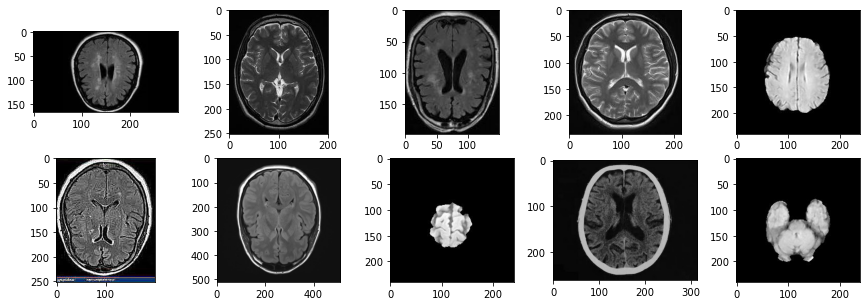

In [10]:
t0_images = getFullFilePaths(t0_folder)
t0_random = random.sample(t0_images, 11)

# View the images
plt.subplots(figsize=(15, 5))

for i in range(0,10):

    index = i + 1
    plt.subplot(2,5,index)
    image = imread(t0_random[index])
    plt.imshow(image) 
    
plt.show()

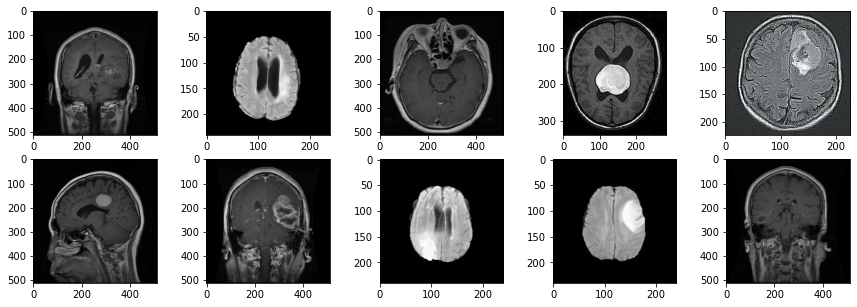

In [146]:
t1_images = getFullFilePaths(t1_folder)
t1_random = random.sample(t1_images, 11)

# View the images
plt.subplots(figsize=(15, 5))

for i in range(0,10):

    index = i + 1
    plt.subplot(2,5,index)
    image = imread(t1_random[index])
    plt.imshow(image) 
    
plt.show()

In [147]:
widths = []
heights = []

allImagePaths = t0_images + t1_images

for imgPath in allImagePaths:
    
    image = imread(imgPath)
    widths.append(image.shape[0])
    heights.append(image.shape[1])

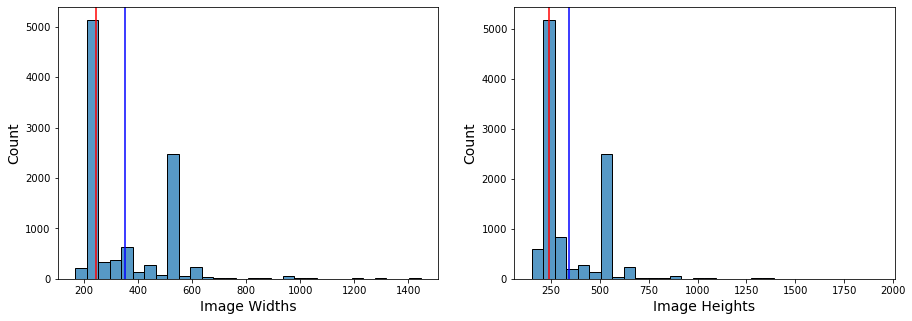

In [148]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(widths,
            bins=30, ax=axes[0])
axes[0].set_xlabel("Image Widths", size=14)
axes[0].set_ylabel("Count", size=14)
axes[0].axvline(x=stat.mean(widths),
            color='blue')
axes[0].axvline(x=stat.median(widths),
            color='red')

sns.histplot(heights,
            bins=30, ax=axes[1])
axes[1].set_xlabel("Image Heights", size=14)
axes[1].set_ylabel("Count", size=14)
axes[1].axvline(x=stat.mean(heights),
            color='blue')
axes[1].axvline(x=stat.median(heights),
            color='red')

In [ ]:
#Train/Test/Val Sets

In [118]:
import fast_ml
from fast_ml.model_development import train_valid_test_split

In [149]:
t0 = os.listdir(os.getcwd() + "/Data/T0")
t0_labels = [0]*len(t0)
d_t0 = {'ImgNames':t0,'Class':t0_labels}
df_t0 = pd.DataFrame(d_t0)

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_t0, target = 'Class', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(3258, 1)
(3258,)
(407, 1)
(407,)
(408, 1)
(408,)


(None, None)

In [150]:
destinationTrain = os.getcwd() + "/Data/TrainTestVal/Train/Normal/"
destinationTest = os.getcwd() + "/Data/TrainTestVal/Test/Normal/"
destinationVal = os.getcwd() + "/Data/TrainTestVal/Val/Normal/"

for name in X_train["ImgNames"]:
    source = os.path.join(t0_folder, name)  
    target = os.path.join(destinationTrain, name)
    shutil.copy(source, target)
        
for name in X_test["ImgNames"]:
    source = os.path.join(t0_folder, name)  
    target = os.path.join(destinationTest, name)
    shutil.copy(source, target)
    
for name in X_valid["ImgNames"]:
    source = os.path.join(t0_folder, name)  
    target = os.path.join(destinationVal, name)
    shutil.copy(source, target)

In [151]:
print(len(os.listdir(destinationTrain)))

3258


In [152]:
t1 = os.listdir(os.getcwd() + "/Data/T1")
t1_labels = [1]*len(t1)
d_t1 = {'ImgNames':t1,'Class':t1_labels}
df_t1 = pd.DataFrame(d_t1)

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_t1, target = 'Class', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(4881, 1)
(4881,)
(610, 1)
(610,)
(611, 1)
(611,)


(None, None)

In [154]:
destinationTrain = os.getcwd() + "/Data/TrainTestVal/Train/Tumor/"
destinationTest = os.getcwd() + "/Data/TrainTestVal/Test/Tumor/"
destinationVal = os.getcwd() + "/Data/TrainTestVal/Val/Tumor/"

for name in X_train["ImgNames"]:
    source = os.path.join(t1_folder, name)  
    target = os.path.join(destinationTrain, name)
    shutil.copy(source, target)

for name in X_test["ImgNames"]:
    source = os.path.join(t1_folder, name)  
    target = os.path.join(destinationTest, name)
    shutil.copy(source, target)
    
for name in X_valid["ImgNames"]:
    source = os.path.join(t1_folder, name)  
    target = os.path.join(destinationVal, name)
    shutil.copy(source, target)
    
print(len(os.listdir(destinationTrain)))
print(len(os.listdir(destinationTest)))
print(len(os.listdir(destinationVal)))

4881
611
610


In [155]:
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Train/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Test/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Val/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Train/Normal/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Test/Normal/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal/Val/Normal/")))

4881
611
610
3258
408
407


In [156]:
print(len(os.listdir(os.getcwd() + "/Data/DS1_BR35H/Br35H-Mask-RCNN/TEST/")))
print(len(os.listdir(os.getcwd() + "/Data/DS1_BR35H/Br35H-Mask-RCNN/TRAIN/")))
print(len(os.listdir(os.getcwd() + "/Data/DS1_BR35H/Br35H-Mask-RCNN/VAL/")))
print(len(os.listdir(os.getcwd() + "/Data/DS1_BR35H/no/")))
print(len(os.listdir(os.getcwd() + "/Data/DS1_BR35H/yes/")))

101
501
202
1500
1500


In [157]:
t0 = os.listdir(os.getcwd() + "/Data/DS1_BR35H/no/")
t0_labels = [0]*len(t0)
d_t0 = {'ImgNames':t0,'Class':t0_labels}
df_t0 = pd.DataFrame(d_t0)

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_t0, target = 'Class', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(1200, 1)
(1200,)
(150, 1)
(150,)
(150, 1)
(150,)


(None, None)

In [158]:
destinationTrain = os.getcwd() + "/Data/TrainTestVal_DS1/Train/Normal/"
destinationTest = os.getcwd() + "/Data/TrainTestVal_DS1/Test/Normal/"
destinationVal = os.getcwd() + "/Data/TrainTestVal_DS1/Val/Normal/"

for name in X_train["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/no/", name)  
    target = os.path.join(destinationTrain, name)
    shutil.copy(source, target)
        
for name in X_test["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/no/", name)  
    target = os.path.join(destinationTest, name)
    shutil.copy(source, target)
    
for name in X_valid["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/no/", name)  
    target = os.path.join(destinationVal, name)
    shutil.copy(source, target)

In [159]:
t1 = os.listdir(os.getcwd() + "/Data/DS1_BR35H/yes/")
t1_labels = [1]*len(t1)
d_t1 = {'ImgNames':t1,'Class':t1_labels}
df_t1 = pd.DataFrame(d_t1)

X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df_t1, target = 'Class', 
                                                                            train_size=0.8, valid_size=0.1, test_size=0.1)
print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

destinationTrain = os.getcwd() + "/Data/TrainTestVal_DS1/Train/Tumor/"
destinationTest = os.getcwd() + "/Data/TrainTestVal_DS1/Test/Tumor/"
destinationVal = os.getcwd() + "/Data/TrainTestVal_DS1/Val/Tumor/"

for name in X_train["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/yes/", name)  
    target = os.path.join(destinationTrain, name)
    shutil.copy(source, target)
        
for name in X_test["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/yes/", name)  
    target = os.path.join(destinationTest, name)
    shutil.copy(source, target)
    
for name in X_valid["ImgNames"]:
    source = os.path.join(os.getcwd() + "/Data/DS1_BR35H/yes/", name)  
    target = os.path.join(destinationVal, name)
    shutil.copy(source, target)

(1200, 1)
(1200,)
(150, 1)
(150,)
(150, 1)
(150,)


In [160]:
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Train/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Test/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Val/Tumor/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Train/Normal/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Test/Normal/")))
print(len(os.listdir(os.getcwd() + "/Data/TrainTestVal_DS1/Val/Normal/")))

1200
150
150
1200
150
150


In [171]:
import keras.backend as K

def f1_score(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0.0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score

In [173]:
from tensorflow import keras
model = keras.models.load_model(os.getcwd() + "/ENB4_BrainTumorClassifier.h5",
                               custom_objects={"f1_score": f1_score})

In [196]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size=(300,300)
channels=3
batch_size=32
img_shape=(img_size[0], img_size[1], channels)

def scalar(img):    
    return img  # EfficientNet expects pixelsin range 0 to 255 so no scaling is required

gen=ImageDataGenerator(preprocessing_function=scalar)


test = os.getcwd() + "/Data/TrainTestVal/Test/"
test_gen=gen.flow_from_directory(directory = test, target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=batch_size)

Found 1019 images belonging to 2 classes.


In [177]:
trainNormal = os.getcwd() + "/Data/TrainTestVal/Test/Normal/" 
trainNormalNames = os.listdir(trainNormal)

trainNormal + trainNormalNames[0]

'/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Normal/DS1_T0_no1013.jpg'

In [206]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

def predict_tumor(img_path):
    # load the image
    img = load_img(img_path,target_size=(300, 300, 3))
    # convert to array
    img_array = np.array(img)
    plt.imshow(img_array[0])
    plt.show()
    print(model.predict(img_array))
    if model.predict(img_array)[0][0]>0.4:
        print("The image indicates presence of Brain tumor")
    else:
        print("This is a Healthy Brain")
    print(model.predict(img_array)[0][0])

In [223]:
img = load_img(trainNormal + trainNormalNames[0],target_size=(300,300,3))
img

ValueError: Failed to find data adapter that can handle input: <class 'PIL.Image.Image'>, <class 'NoneType'>

(300, 300, 3)


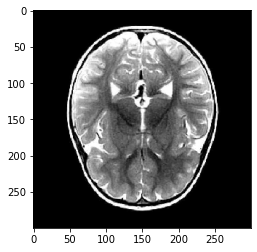

(1, 300, 300, 3)
1/1 [==============================] - 0s 210ms/step
[[0.98854965 0.01145038]]
1/1 [==============================] - 0s 183ms/step
[0.98854965 0.01145038]


In [226]:
img = load_img(trainNormal + trainNormalNames[0],target_size=(300,300,3))
#print(img.shape)

img_array = np.array(img)
print(img_array.shape)
plt.imshow(img_array)
plt.show()
img_array= img_array[np.newaxis, :]
print(img_array.shape)
print(model.predict(img_array))
print(model.predict(img_array)[0])

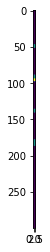

ValueError: in user code:

    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/engine/training.py", line 2137, in predict_function  *
        return step_function(self, iterator)
    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/engine/training.py", line 2123, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/engine/training.py", line 2111, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/engine/training.py", line 2079, in predict_step
        return self(x, training=False)
    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_8" is incompatible with the layer: expected shape=(None, 300, 300, 3), found shape=(None, 300, 3)


In [207]:
predict_tumor(test_gen.filepaths[700])

In [234]:
import io
import panel as pn
pn.extension()

In [233]:
def f(x):
    return x * x
pn.interact(f, x=10)

Column
    [0] Column
        [0] IntSlider(end=30, name='x', start=-10, value=10)
    [1] Row
        [0] Str(int, name='interactive00108')

In [235]:
file_input = pn.widgets.FileInput()

file_input

FileInput()

In [239]:
import param
import panel as pn
pn.extension()
from io import BytesIO
from PIL import Image

class TestApp(param.Parameterized):
         fi = pn.widgets.FileInput()
         
         @pn.depends('fi.value')
         def pict(self):
               if isinstance(self.fi.value,type(None)):
                   return pn.Row()
               b = BytesIO()
               self.fi.save(b)
               return pn.Pane(Image.open(b))

t1=TestApp()
pn.Row(t1.fi,t1.pict)


Traceback (most recent call last):
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/pyviz_comms/__init__.py", line 346, in _handle_msg
 self._on_msg(msg)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/viewable.py", line 292, in _on_msg
 doc.unhold()
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/bokeh/document/document.py", line 799, in unhold
 self.callbacks.unhold()
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 396, in unhold
 self.trigger_on_change(event)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 373, in trigger_on_change
 invoke_with_curdoc(doc, event.callback_invoker)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/bokeh/util/callback_manager.py", line 191, in invoke
 callback(attr, old, new)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/reactive.py", line 392, in _comm_change
 self._schedule_change(doc, comm)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/reactive.py", line 376, in _schedule_change
 self._change_event(doc)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/reactive.py", line 370, in _change_event
 self._process_events(events)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/reactive.py", line 315, in _process_events
 self.param.update(**self_events)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/param/parameterized.py", line 1898, in update
 self_._batch_call_watchers()
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/param/parameterized.py", line 2059, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/param/parameterized.py", line 2021, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/param.py", line 843, in update_pane
 self._replace_pane()
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/param.py", line 794, in _replace_pane
 new_object = self.eval(self.object)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/panel/param.py", line 777, in eval
 return function(*args, **kwargs)
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/param/parameterized.py", line 407, in _depends
 return func(*args, **kw)
 File "/var/folders/c6/n1xq4jq1587fxskf_7ld55phswbj47/T/ipykernel_63716/2874844553.py", line 16, in pict
 return pn.Pane(Image.open(b))
 File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/PIL/Image.py", line 3030, in open
 raise UnidentifiedImageError(
PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f853ce3cc70>

Row
    [0] FileInput()
    [1] ParamMethod(method)

In [237]:
img = load_img(file_input.value)

ValueError: embedded null byte

In [11]:
!pip3 install torchvision


     |████████████████████████████████| 1.4 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 18.1 MB 11.7 MB/s eta 0:00:01
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
     |████████████████████████████████| 137.9 MB 15.7 MB/s eta 0:00:01  |██▏                             | 9.2 MB 7.7 MB/s eta 0:00:17
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
     |████████████████████████████████| 155 kB 11.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [13]:
import torch

In [18]:
!git clone https://github.com/ultralytics/yolov5  # clone

Cloning into 'yolov5'...
remote: Enumerating objects: 14513, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 14513 (delta 19), reused 24 (delta 14), pack-reused 14477
Receiving objects: 100% (14513/14513), 13.66 MiB | 6.06 MiB/s, done.
Resolving deltas: 100% (10000/10000), done.


In [19]:
%cd yolov5

/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5


In [20]:
%pip install -qr requirements.txt  # install requirements

Note: you may need to restart the kernel to use updated packages.


In [21]:
from yolov5 import utilsb

ImportError: cannot import name 'utilsb' from 'yolov5' (unknown location)

In [30]:
folder = "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolo/TrainTestVal/test/images/"

In [26]:
folder = "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolo/TrainTestVal/test/images/"
for name in os.listdir(folder):
    path = os.path.join(folder, name)
    !python detect.py --weights last.pt --img 640 --conf 0.5 --source path

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 111, in run
    dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/utils/dataloaders.py", line 253, in __init__
    raise FileNotFoundError(f'{p} does not exist')
FileNotFoundError: /Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/path does not exist
^C
detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[6

YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwargs)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 111, in run
    dataset = LoadImages(source, img_size=imgsz, stride=stride, auto=pt, vid_stride=vid_stride)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/utils/dataloaders.py", line 253, in __init__
    raise FileNotFoundError(f'{p} does not exist')
FileNotFoundError: /Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/path does not exist
de

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

In [43]:
!python detect.py --weights last.pt --img 640 --conf 0.5 --source path

detect: weights=['last.pt'], source=path, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Traceback (most recent call last):
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 261, in <module>
    main(opt)
  File "/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolov5/detect.py", line 256, in main
    run(**vars(opt))
  File "/Users/gordid/pyrosetta_environment/ENTER/lib/python3.9/site-packages/torch/autograd/grad_mode.py", line 27, in decorate_context
    return func(*args, **kwa

In [33]:
folder

'/Users/gordid/Desktop/MSAI/FAI/FinalProject/yolo/TrainTestVal/test/images/'

In [42]:
path = "/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Tumor/DS2_T1_C1_gg (111).jpg"
path

'/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Tumor/DS2_T1_C1_gg (111).jpg'

In [46]:
!python detect.py --weights last.pt --img 640 --conf 0.5 --source "/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Tumor/DS2_T1_C1_gg (111).jpg"

detect: weights=['last.pt'], source=/Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Tumor/DS2_T1_C1_gg (111).jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-33-g1752768 Python-3.9.7 torch-1.13.0 CPU

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /Users/gordid/Desktop/MSAI/FAI/FinalProject/Data/TrainTestVal/Test/Tumor/DS2_T1_C1_gg (111).jpg: 640x640 1 tumor, 207.3ms
Speed: 4.8ms pre-process, 207.3ms inference, 19.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp13
